In [363]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Coin exercise**

Let's do some experiments with a coin and the Laplace rule

In [364]:
import numpy as np
import random 

In [365]:
value_range = 2
experiments_number = 2000 # The more times we run the experiment, the closest it will get to our probability estimation


result = np.random.randint(value_range, size=experiments_number) # random number between 0 and n-1

print(f"Result random experiment: {result}")

Result random experiment: [0 1 0 ... 1 0 1]


In [366]:
np.count_nonzero(result)/experiments_number

0.492

In [367]:
result.mean()

np.float64(0.492)

In [368]:
# this obviously needs to be equal to the number of experiments
np.count_nonzero(result==0) + np.count_nonzero(result==1) 

2000

In [369]:
np.count_nonzero(result==0)/experiments_number

0.508

In [370]:
# We can see in a practical way what complimentary events are
1-np.count_nonzero(result==0)/experiments_number

0.492

In [371]:
# If the probabilities in p do not sum to 1, an error will be raised
newsize = 10000

newresult = np.random.choice([0,1], p=[0.2,0.8], size=newsize)

# Obviously, the probability of the entire sample space must sum to 1; otherwise, an error will occur

In [372]:
# The result must be very similar to the probability established above
np.count_nonzero(newresult==0)/newsize

0.1931

# **Dice exercise**

Create a random event that throws a dice with 6 sides (entire sample = 1 to 6)

What is the probability of obtining the number 3?

In [373]:
experiments_number = 50000

# Random int between 1 and 6
result = np.random.randint(1, 7, size=experiments_number)
print(f"Result random experiment: {result}")

# Probability of obtaining 3 (according to Laplace's rule)
prob = np.count_nonzero(result==3)/experiments_number
print(f"Probability of obtaining 3: {prob}")
# P=1/6 = 1.666

Result random experiment: [4 6 1 ... 1 6 3]
Probability of obtaining 3: 0.17112


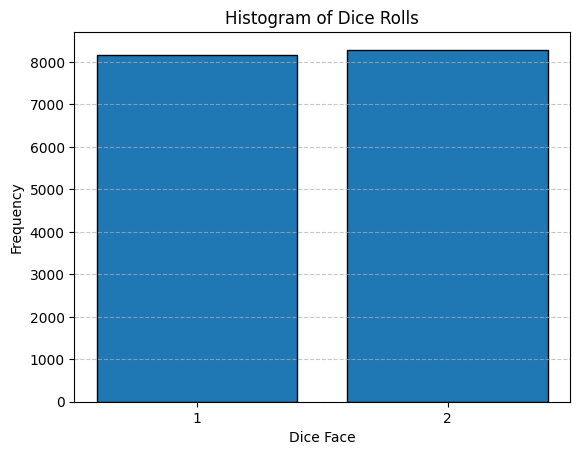

In [374]:
import matplotlib.pyplot as plt
# Plot histogram. As we can see the theoretical probability for each number is the same, and the "practice" 
# should be close to it
plt.hist(result, bins=np.arange(1, value_range + 2) - 0.5, edgecolor='black', rwidth=0.8)
plt.title('Histogram of Dice Rolls')
plt.xlabel('Dice Face')
plt.ylabel('Frequency')
plt.xticks(range(1, value_range + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Repeat the same dice throw twice**

In [375]:
experiments_number = 2

# Random int between 1 and 6
result = np.random.randint(1, 7, size=experiments_number)

print(result)
# We wobserve that we might not have obtained any 3 despite we said the probability was 1/6. 
# Of course that is just because we need to increase the number of experiments. 
# The higher the number of experiments, the closer we get to the expected value (Law of Large Numbers)

[6 2]


In [376]:
# If we repeat the experiment above 1000 and 10000 times respectively, we will get a much closer approximation to the expected value
experiments_number = 1000
result = np.random.randint(1, 7, size=experiments_number)
prob = np.count_nonzero(result==3)/experiments_number
print(prob)

experiments_number = 10000
result = np.random.randint(1, 7, size=experiments_number)
prob = np.count_nonzero(result==3)/experiments_number
print(prob)

0.181
0.162


**What is the probability of obtaining an even number?**

In [377]:
# The even numbers on a dice are 2, 4, 6, the odd are obviously 1, 3, 5
# By Laplace's rule (and logic), P(even number) = 0.5. Let's see if that is true with some experiments
experiments_number = 50000

# Random int between 1 and 6
result = np.random.randint(1, 7, size=experiments_number)
print(f"Result random experiment: {result}")

# Probability of obtaining 2,4,6 (according to Laplace's rule)
prob_even = (np.count_nonzero(result==2) + np.count_nonzero(result==4) + np.count_nonzero(result==6))/experiments_number
print(f"Probability of obtaining even: {prob_even}")
# P=3/6 = 1/2 = 0.5

Result random experiment: [6 5 1 ... 2 1 3]
Probability of obtaining even: 0.49908


**What is the probability of obtaining an odd number?**

In [378]:
# Same as above but vice versa...
experiments_number = 50000

# Random int between 1 and 6
result = np.random.randint(1, 7, size=experiments_number)
print(f"Result random experiment: {result}")

# Probability of obtaining 1,3,5 (according to Laplace's rule)
prob_odd = (np.count_nonzero(result==1) + np.count_nonzero(result==3) + np.count_nonzero(result==4))/experiments_number
print(f"Probability of obtaining an odd number: {prob_odd}")
# P=3/6 = 1/2 = 0.5

# OR more elegantly... the probability of obtaining an odd number is the complementary event of obtaining an even number, so:
prob_odd_complement = 1 - prob_even
print(f"Probability of obtaining an odd number (complementary method): {prob_odd_complement}")

# We can observe the probability is pretty much the same

Result random experiment: [3 3 1 ... 1 3 2]
Probability of obtaining an odd number: 0.50208
Probability of obtaining an odd number (complementary method): 0.50092


**What is the probability of obtaining a number smaller than 3?**

In [379]:
# Well the dice has 6 numbers... and we are being asked P(X<3), that means the sample space = {1, 2}
# thus according to Laplace's rule P(X<3)=2/6=0.333. Let's see if the experiments tells us the same story:
experiments_number = 50000

# Probability of obtaining 1,2,3,4,5 (according to Laplace's rule)
prob = (np.count_nonzero(result==1) 
        + np.count_nonzero(result==2))/experiments_number
print(f"Probability of obtaining 2 or less is the probability of obtaining 1 + the probability of obtaining 2: {prob}") # and that meets the expectations!

Probability of obtaining 2 or less is the probability of obtaining 1 + the probability of obtaining 2: 0.3384


# **Conditional probability**

#### Exercise 1
**What is the probability of achieving the desired grade knowing that the student has missed more than n days?**

- Desired grade: 60
- Number of absences: 5

In [380]:
# Load the data
import requests
import io

url = "https://raw.githubusercontent.com/NechuBM/dataset/main/student-dataset.csv"

req = requests.request(method="GET", url=url)

file = io.open("student-dataset.csv", "w")
file.write(req.text)
file.close()

students_DF = pd.read_csv("student-dataset.csv", sep=";")

In [381]:
# I don't need that many columns, G3 and absences should be fine (plus goout for later)
students_DF.columns.sort_values()

simple_DF = students_DF[["absences", "G3", "goout"]].copy() # let's work with a copy instead of a reference, in case I need the original DF later
simple_DF.columns = ["absences", "grades", "goout"]

simple_DF.sample(5) # Checking we are fine

,absences,grades,goout
524,2,8,1
208,0,12,3
106,4,10,2
499,0,16,5
203,6,10,3


In [382]:
simple_DF.describe()

,absences,grades,goout
count,649.000000,649.000000,649.000000
mean,3.659476,11.906009,3.184900
std,4.640759,3.230656,1.175766
min,0.000000,0.000000,1.000000
25%,0.000000,10.000000,2.000000
50%,2.000000,12.000000,3.000000
75%,6.000000,14.000000,4.000000
max,32.000000,19.000000,5.000000


array([[<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'grades'}>],
       [<Axes: title={'center': 'goout'}>, <Axes: >]], dtype=object)

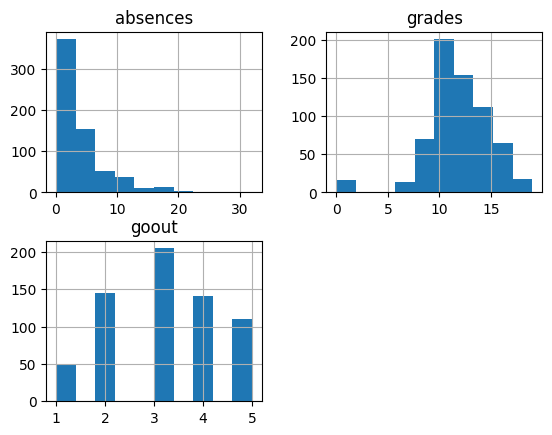

In [383]:
# Check the data distribution
simple_DF.hist() 

<Axes: >

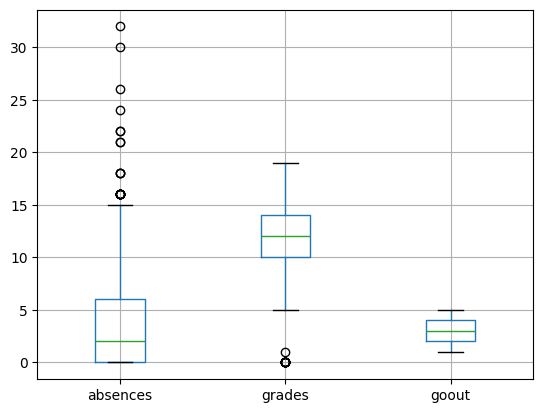

In [384]:
# Check the boxplot to better understand outliers, median, max, mins, quartiles...
simple_DF.boxplot()

*Problem interpretation:*

A = absences<br>
B = pass

P(B|A) = P(A ∩ B) / P(A)

P(pass|absences) = P(absences  ∩  pass) / P(absences)

In [385]:
# Add a column (feature) that will have 1 for columns with +5 absence, else 0
simple_DF["abs_count"] = [1 if x >5 else 0 for x in simple_DF["absences"]]

In [386]:
simple_DF.head() # Looks good

,absences,grades,goout,abs_count
0,4,11,4,0
1,2,11,3,0
2,6,12,2,1
3,0,14,2,0
4,0,13,2,0


In [387]:
# Let's double-check
print(f"Min value for the abs_count column ", simple_DF["abs_count"].min())
print(f"Max value for the abs_count column ", simple_DF["abs_count"].max())

Min value for the abs_count column  0
Max value for the abs_count column  1


In [388]:
# This is the probability A (more than n days where n=5)
prob_absences = simple_DF["abs_count"].mean()

print(f"Probability of being absence > n days (n=5): " , prob_absences)

Probability of being absence > n days (n=5):  0.26348228043143296


In [389]:
# Re-escale the grades column
simple_DF["grades"] = simple_DF["grades"] * 5

simple_DF.head() # Looks good

,absences,grades,goout,abs_count
0,4,55,4,0
1,2,55,3,0
2,6,60,2,1
3,0,70,2,0
4,0,65,2,0


In [ ]:
# Add a column (feature) that will have 1 for columns with +60 score, else 0
simple_DF['grades_count'] = simple_DF['grades'].apply(lambda x: x>60, 1, 0)

C:\Users\jbosc\AppData\Local\Temp\ipykernel_17852\2750490464.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  simple_DF['grades_count'] = simple_DF['grades'].apply(lambda x: x>60, 1, 0)


In [391]:
# Check the result
simple_DF.head()

,absences,grades,goout,abs_count,grades_count
0,4,55,4,0,False
1,2,55,3,0,False
2,6,60,2,1,False
3,0,70,2,0,True
4,0,65,2,0,True


In [397]:
# Let's double-check
print(f"Min value for the abs_count column ", simple_DF["grades_count"].min())
print(f"Max value for the abs_count column ", simple_DF["grades_count"].max())

Min value for the abs_count column  False
Max value for the abs_count column  True


In [398]:
# This is the probability B, obtaining a score > 60

prob_score = simple_DF["grades_count"].mean()

print(f"Probability of scoring > 60: " , prob_score)

Probability of scoring > 60:  0.4252696456086287


In [394]:
# To solve the problem we need all the rows with True in both counter columns
filtered = simple_DF[(simple_DF["abs_count"] == True) & (simple_DF["grades_count"] == True)]

filtered.shape

(55, 5)

In [395]:
prob_intersection = len(filtered) / len(simple_DF)

prob_intersection

0.0847457627118644

In [396]:
# Now we just need to replace the obtained variables in the formula:
# P(pass|absences) = P(absences  ∩  pass) / P(absences)
P_conditional_pass_absences = prob_intersection / prob_absences

print(P_conditional_pass_absences)

0.3216374269005848


#### Exercise 2

**The column 'goout' indicates, with a value from 1 to 5, the frequency of going out with friends, where 1 is 'very low' and 5 is 'very high'.**

- What is the probability of achieving the desired grade knowing that the student has a healthy social life?
- A healthy social life is defined as having a value in the 'goout' column greater than or equal to 3.

*Problem interpretation*

A = achieving the desired grade (>60) <br> 
B = the student has a healthy social life

\* Healthy social life → 'goout' >=3

P(A|B) = P(B ∩ A) / P(B)

In [ ]:
# We can recycle our old friend simple_DF DataFrame
simple_DF.head()

,absences,grades,goout,abs_count,grades_count
0,4,55,4,0,False
1,2,55,3,0,False
2,6,60,2,1,False
3,0,70,2,0,True
4,0,65,2,0,True


In [414]:
# Refresher (just for the columns that we are going go use)
simple_DF[['goout', 'grades']].describe()

,goout,grades
count,649.000000,649.000000
mean,3.184900,59.530046
std,1.175766,16.153281
min,1.000000,0.000000
25%,2.000000,50.000000
50%,3.000000,60.000000
75%,4.000000,70.000000
max,5.000000,95.000000


array([[<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'grades'}>]], dtype=object)

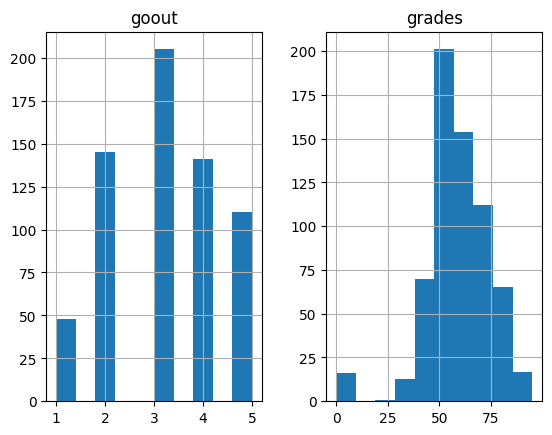

In [415]:
simple_DF[['goout', 'grades']].hist()

<Axes: >

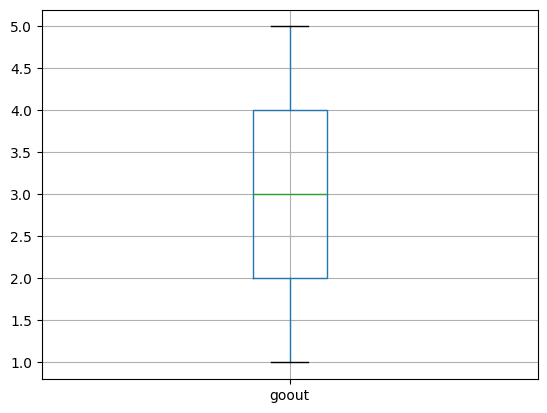

In [ ]:
simple_DF[['goout']].boxplot()

<Axes: >

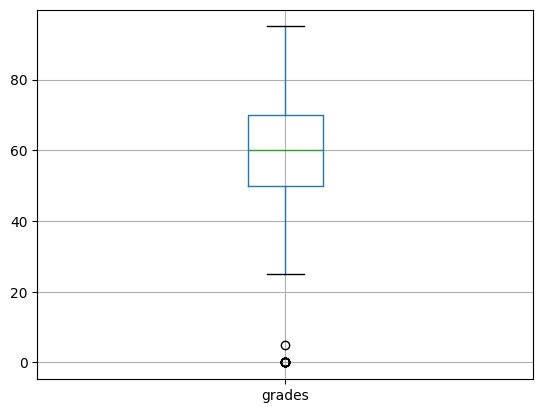

In [420]:
simple_DF[['grades']].boxplot()

In [421]:
simple_DF['goout_count'] = simple_DF['goout'].apply(lambda x: x>=3, 1, 0)

C:\Users\jbosc\AppData\Local\Temp\ipykernel_17852\766683638.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  simple_DF['goout_count'] = simple_DF['goout'].apply(lambda x: x>=3, 1, 0)


In [422]:
prob_social_life = simple_DF["goout_count"].mean()

print(f'Probability of student having a healthy social life: ', prob_social_life)

Probability of student having a healthy social life:  0.7026194144838213


In [423]:
prob_score = simple_DF["grades_count"].mean()

print(f"Probability of scoring > 60: " , prob_score)

Probability of scoring > 60:  0.4252696456086287


In [426]:
prob_intersection = prob_score * prob_social_life

print(f'P(B ∩ A): ', prob_intersection)

P(B ∩ A):  0.29880270939527687


In [427]:
# Final calculation: 
# P(A|B) = P(B ∩ A) / P(B)

p_achievin_grade_coditioned_healthy_social = prob_intersection / prob_score

print(f"Probability of passing having a healthy life: ", p_achievin_grade_coditioned_healthy_social)

Probability of passing having a healthy life:  0.7026194144838213
